### Modeller
Baselines vi skal have med:
- Random choose candidates from df
- Mergesort choose candidates from df
- Mergesort hardcoded to account for gender
- Plain RankNet

Fair model:
- RankNet account for diversity 

Load packages

In [23]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
import random 
from sklearn.utils import shuffle

Plots setup

In [2]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

Load dataset

In [3]:
df = pd.read_csv("df_sum_score.csv")

## Create Baseline dataframes

#### Mergesort

In [4]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [6]:
#Top 100
df_sort100 = df_sort[:100]
df_sort100

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6145,6145,M,Stratum 4,71,91,95,100,100,99,99.666667,85.666667,0
6269,6269,M,Stratum 1,100,67,90,100,96,99,98.333333,85.666667,0
8041,8041,M,Stratum 3,82,90,85,100,99,96,98.333333,85.666667,0
8352,8352,M,Stratum 6,75,82,100,42,2,94,46.000000,85.666667,0


#### Random Sort

In [7]:
#Top 100 for 1 Random sort
df_random100 = df.sample(n = 100, random_state=2)
df_random100

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
2818,2818,F,Stratum 3,79,83,78,92,87,95,91.333333,80.000000,1
1164,1164,M,Stratum 5,50,62,85,70,55,90,71.666667,65.666667,0
1112,1112,F,Stratum 3,70,59,64,88,93,85,88.666667,64.333333,1
1029,1029,M,Stratum 3,60,57,41,61,3,28,30.666667,52.666667,0
6399,6399,F,Stratum 4,58,62,62,39,68,75,60.666667,60.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12056,12056,M,Stratum 3,65,65,75,81,83,90,84.666667,68.333333,0
6575,6575,F,Stratum 1,65,60,42,57,45,55,52.333333,55.666667,1
1172,1172,F,Stratum 3,52,58,54,4,14,58,25.333333,54.666667,1
8098,8098,F,Stratum 6,71,73,95,95,92,98,95.000000,79.666667,1


#### Merge sort for Female df and Male df and append and sort

In [9]:
#Top 100
def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_df100 = gender_mergesort(df)


#Gendersort all
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

gender_df = gender_mergesort_all(df)


In [10]:
gender_df100

,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0
2,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1
3,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,5198,5198,F,Stratum 2,87,73,90,96,84,92,90.666667,83.333333,1
96,48,12204,12204,M,Stratum 5,84,77,100,100,98,92,96.666667,87.000000,0
97,48,5877,5877,F,Stratum 2,74,91,85,98,93,3,64.666667,83.333333,1
98,49,8104,8104,F,Stratum 2,86,82,82,87,96,93,92.000000,83.333333,1


## Create baseline plots

### Mergesort as function of n

In [13]:
# The mergesort as function of n
#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()

#evt.:

#check the incremented average grades
#df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

#set cumsum of index to use for plot
df_avg["n_students"] = range(len(df))

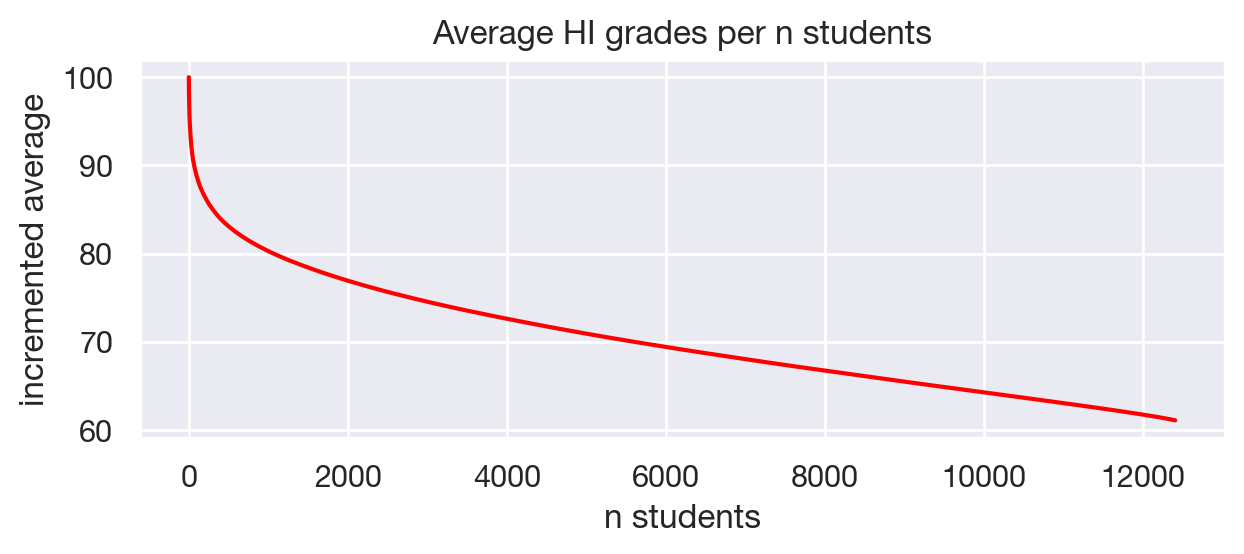

In [16]:
# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color="red").set_title("Mergesort Average HI grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented average')
plt.show()

### Gendersort as function of n

In [15]:
# The gendersort as function of n
#set the incremented hi avg as column
gender_df["incr_hi_mean"] = gender_df.HI_GRADE_AVG.expanding().mean()

#evt.:
#check the incremented average grades
#gender_df["incr_hi_mean"] #index "2" er average af 100+97/2


#cumsum of index to use for plot
gender_df["n_students"] = range(len(gender_df))

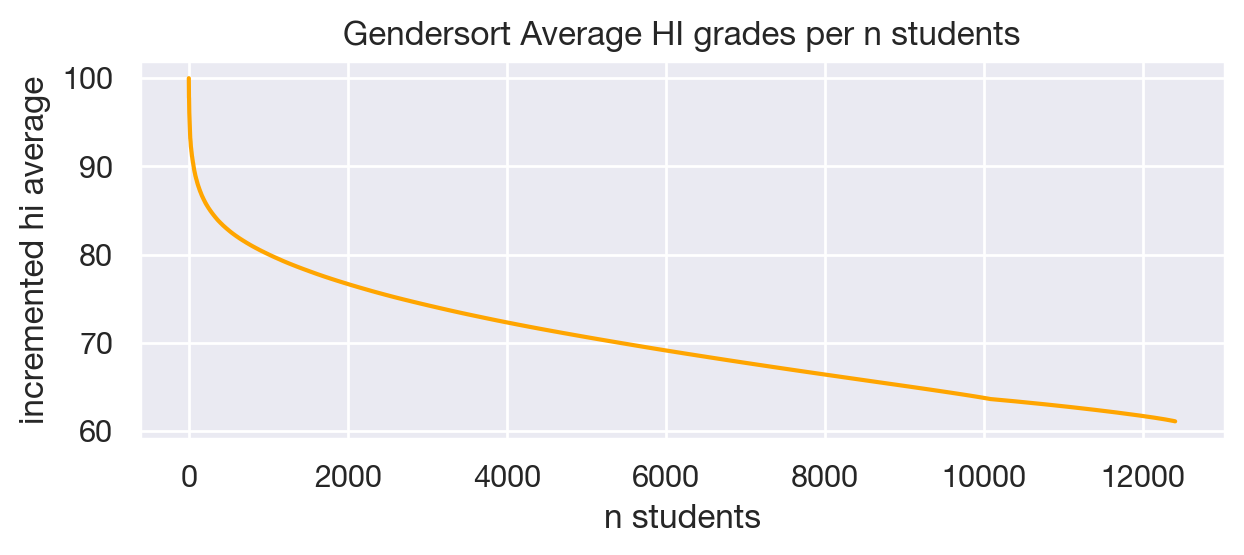

In [18]:
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df, color="orange").set_title("Gendersort Average HI grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented hi average')
plt.show()

### Random sort as function of n
2000 samples of random dataframes are generated and plotted with std. as error bars

In [24]:
#Random generated dfs

df_use = df[["Unnamed: 0","HI_GRADE_AVG", "GENDER_bin", "STRATUM"]]

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(len(df_random1))
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_hi_mean"] = df_random2.HI_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(len(df_random2))
        df_random1 = df_random1.append(df_random2)

In [ ]:
#First we plot the random grades per n students
# w 2000 samples

sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean", ci="sd")
plt.title("2000 random sampled dfs with std as error bars")
plt.show()

### Random sort together with mergesort and gendersort as function of n

In [ ]:
# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color='red')
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df, color ='orange')
sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of HI grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
plt.show()

In [ ]:
#deeper look into the plot, only first 2000 

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg[:2000], color='red')
sns.lineplot(x="n_students", y="incr_hi_mean", data=gender_df[:2000], color ='orange')
sns.lineplot(data=df_random1[:2000], x="n_students", y="incr_hi_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of HI grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
Axes.set_ylim(bottom = 58, top=105)
plt.show()

## Entropy as a function of *n* for the different baselines
Using the Shannon entropy from https://en.wikipedia.org/wiki/Diversity_index:
$H^{\prime}=-\sum_{i=1}^{R} p_{i} \ln p_{i}$.

### Entropy of gender 

In this case *i* = {M, F}. I.e. $p_{i}$ is the ratio of either M or F in the given sample.
Log base 2 is used, as M and F are binary input, also described in (https://en.wikipedia.org/wiki/Diversity_index).


Afterwards entropy of gender-stratum pair is computed.

**Gender entropy in mergesorted df**

In [ ]:
# Reset index of merge sort
df_sort = df.sort.reset_index()

In [ ]:
#For each row incremented, get ratio of M and F
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))

In [ ]:
#Create new column with the ratios
df_sort["value_counts_col_GENDER"] = data_value_counts_gen

In [ ]:
# Check if probabilities look correct
df_sort[["value_counts_col_GENDER", "GENDER_bin"]][:5] 

In [ ]:
#For each row incremented, get entropy 
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col"][i]*np.log2(df_sort["value_counts_col"][i])).sum())

In [ ]:
#Create new column with the entropy
df_sort["entropy_col"] = data_entropy

In [ ]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log2(0.5)))
df_sort[["GENDER", "value_counts_col_GENDER", "entropy_col"]]

**Gender entropy in gendersorted df**

In [ ]:
#Value counts/ratio per row

data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log2(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER


### Plot of gender entropy of mergesorted and gendersorted df

In [ ]:
#ENTROPY GENDER gender_sort and merge_sort

gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1


# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=gender_df, color="magenta").set_title("average GENDER entropy per n students for gendersorted and mergesorted df")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_sort, color="purple")

plt.xlabel('n students')
plt.ylabel('incremented average entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()

### Entropy of gender-startum pairs
In this case *i* = {1_0, 1_1, 2_0, 2_1, ... , 6_0, 6_1}. We call each entry for a sg-par. E.g. 1_0 represents Stratum 1, Gender F = 0. 6_1 represents Stratum 6, Gender M = 1. 
I.e. $p_{i}$ is the ratio of each sg-pair in the given sample. The entropy is the summation over the number of sg-pair present in the sample. 
Log base e (natural) is used, as each entry
